# Text classication using the Bidirectional versions on IMDB

**Author:** [fchollet](https://twitter.com/fchollet), modified by Priyanka A <br>
**Date created:** 2020/05/03<br>
**Last modified:** 2024/11/29<br>
**Original Description:** Train a 2-layer bidirectional LSTM on the IMDB movie review sentiment classification dataset.

**Modified version:**
C1_RNN.ipynb: Sentiment Analysis using Bidirectional SimpleRNN, LSTM, and GRU.
This script performs text classification on the IMDB dataset using RNN models,
compares their performance, and visualizes key metrics.

## Setup

In [12]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load and Prepare Data

In [13]:
# Load the IMDB dataset
# The dataset contains 25K training and 25K testing samples, preprocessed into integer sequences.
max_features = 20000  # Maximum number of words in the vocabulary
maxlen = 200          # Maximum length of each review (padded or truncated)

# Split data into training and testing sets
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform input length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


# Build Model

In [14]:
def create_model(rnn_layer):
    """
    Creates and compiles a sentiment analysis model with a bidirectional RNN layer.

    Parameters:
    - rnn_layer: RNN layer instance (SimpleRNN, LSTM, or GRU)

    Returns:
    - Compiled Keras model
    """
    model = Sequential([
        Embedding(input_dim=max_features, output_dim=128),  # Embedding layer for word vectors
        Bidirectional(rnn_layer),  # Bidirectional wrapper around the RNN layer
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    # Compile the model with Adam optimizer and binary crossentropy loss
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Train and Evaluate Models

In [ ]:
# Dictionary to store RNN variants for comparison
models = {
    "Bidirectional SimpleRNN": SimpleRNN(64, return_sequences=False),
    "Bidirectional LSTM": LSTM(64, return_sequences=False),
    "Bidirectional GRU": GRU(64, return_sequences=False)
}

# Dictionary to store results for each model
results = {}

# Train and evaluate each model
for name, layer in models.items():
    print(f"Training {name}...")
    model = create_model(layer)  # Create the model with the specified RNN layer
    model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2, verbose=1)

    # Predict sentiment on the test set
    y_pred = (model.predict(x_test) > 0.5).astype("int32")

    # Generate and store performance metrics
    results[name] = classification_report(y_test, y_pred, output_dict=True)

    # Print the confusion matrix for the current model
    print(f"{name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    


Training Bidirectional SimpleRNN...
Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.6190 - loss: 0.6368 - val_accuracy: 0.7824 - val_loss: 0.4643
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7743 - loss: 0.4932 - val_accuracy: 0.8340 - val_loss: 0.3805
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.9030 - loss: 0.2509 - val_accuracy: 0.7810 - val_loss: 0.5059
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step
Bidirectional SimpleRNN Confusion Matrix:
[[ 8844  3656]
 [ 1729 10771]]
Training Bidirectional LSTM...
Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7002 - loss: 0.5317 - val_accuracy: 0.8656 - val_loss: 0.3312
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9169 - loss: 0.2191 - val_accuracy: 0.8662 - val_loss: 0.3232
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9511 - loss: 0.1370 - val_accuracy: 0.8548 - val_loss: 0.3914
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step
Bi

# Inferences

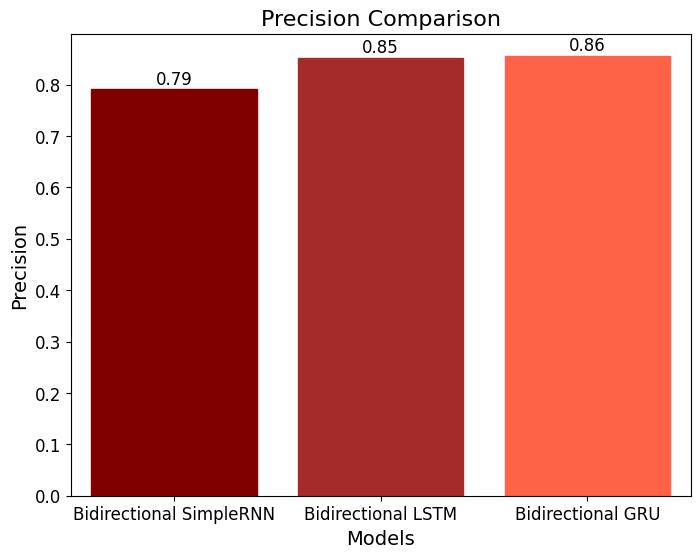

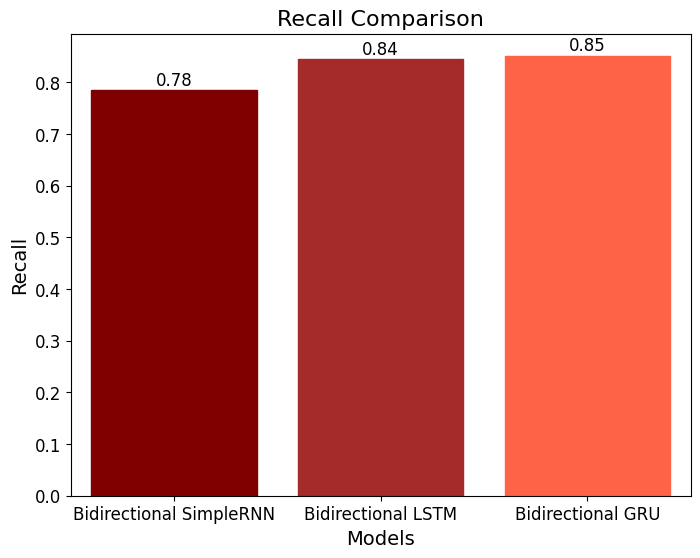

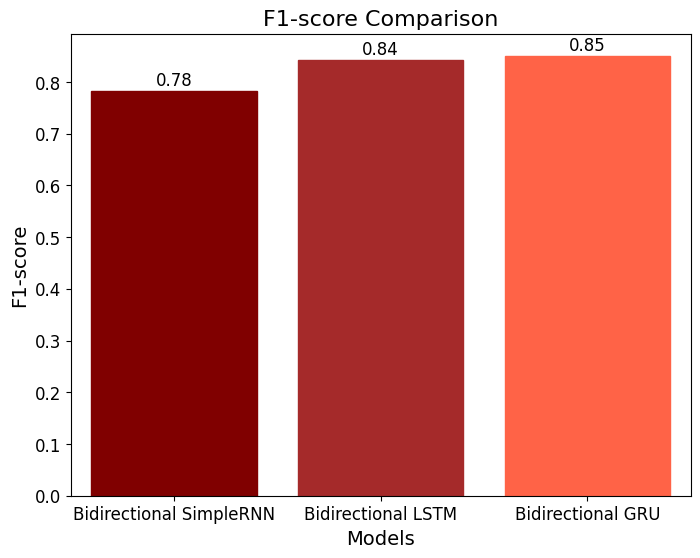

In [18]:
def plot_metrics(results, metric, colors):
    """
    Plots a bar chart comparing a specified metric across models.

    Parameters:
    - results: Dictionary containing model performance metrics
    - metric: Metric to plot ('precision', 'recall', or 'f1-score')
    - colors: List of colors to use for the bars
    """
    values = [results[name]["weighted avg"][metric] for name in models.keys()]
    plt.figure(figsize=(8, 6))

    # Create the bar plot and manually set bar colors
    ax = sns.barplot(x=list(models.keys()), y=values)
    for bar, color in zip(ax.patches, colors):
        bar.set_color(color)

    # Add value labels on top of bars
    for i, v in enumerate(values):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12, color='black')

    # Set plot titles and labels
    plt.title(f"{metric.capitalize()} Comparison", fontsize=16)
    plt.ylabel(metric.capitalize(), fontsize=14)
    plt.xlabel("Models", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Define colors for the bars
colors = ['#800000', '#A52A2A', '#FF6347']

# Generate plots for precision, recall, and F1-score
for metric in ["precision", "recall", "f1-score"]:
    plot_metrics(results, metric, colors)
